## Аналитика мобильных приложений в AppStore

    Ссылка на задачу https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

Этот набор для статистики мобильных приложения в AppStore, состоит из:
1. track_name: Имя приложения
2. size_bytes: Размер (в байтах)
3. currency: Тип валюты
4. price: Стоимость
5. rating_count_tot: Рейтинг пользователей (для всех версий)
6. rating_count_ver: Рейтинг пользователей (для текущей версии)
7. user_rating: Среднее значение пользовательского рейтинга (для всех версий)
8. user_rating_ver: Среднее значение пользовательского рейтинга (для текущей версии)
9. ver: Последний код версии
10. cont_rating: Рейтинг контента
11. prime_genre: Основной жанр
12. sup_devices.num: Количество поддерживающих устройств
13. ipadSc_urls.num: Количество скриншотов для отображения
14. lang.num: Количество поддерживаемых языков
15. vpp_lic: Включено лицензирование на основе устройств Vpp


In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('AppleStore.csv', header=0)
print(data.shape)
data.head()

(7197, 17)


,rank,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


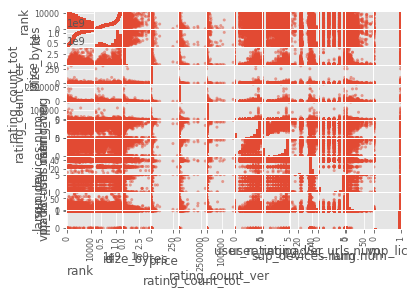

In [3]:
scatter_matrix(data)
pass

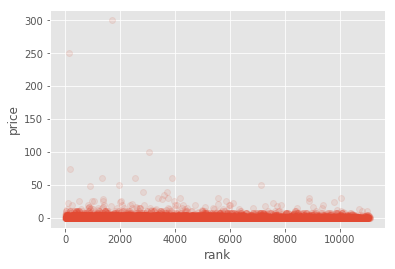

In [4]:
plt.plot(data['rank'], data['price'], 'o', alpha=0.1)
plt.xlabel('rank')
plt.ylabel('price')
pass

In [5]:
print(data['currency'].unique())
print(data['vpp_lic'].unique())

['USD']
[1 0]


In [6]:
data.drop(['id', 'track_name', 'size_bytes', 'ver', 'currency'], axis=1, inplace=True)
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['cont_rating', 'prime_genre']
['rank', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


In [7]:
data[numerical_columns].count()

rank                7197
price               7197
rating_count_tot    7197
rating_count_ver    7197
user_rating         7197
user_rating_ver     7197
sup_devices.num     7197
ipadSc_urls.num     7197
lang.num            7197
vpp_lic             7197
dtype: int64

In [8]:
data_describe = data.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['cont_rating', 'prime_genre']


In [9]:
print(data['cont_rating'].unique())
print(data['prime_genre'].unique())

['4+' '12+' '17+' '9+']
['Games' 'Productivity' 'Weather' 'Shopping' 'Reference' 'Finance' 'Music'
 'Utilities' 'Travel' 'Social Networking' 'Sports' 'Business'
 'Health & Fitness' 'Entertainment' 'Photo & Video' 'Navigation'
 'Education' 'Lifestyle' 'Food & Drink' 'News' 'Book' 'Medical' 'Catalogs']


In [10]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['cont_rating_12+', 'cont_rating_17+', 'cont_rating_4+',
       'cont_rating_9+', 'prime_genre_Book', 'prime_genre_Business',
       'prime_genre_Catalogs', 'prime_genre_Education',
       'prime_genre_Entertainment', 'prime_genre_Finance',
       'prime_genre_Food & Drink', 'prime_genre_Games',
       'prime_genre_Health & Fitness', 'prime_genre_Lifestyle',
       'prime_genre_Medical', 'prime_genre_Music', 'prime_genre_Navigation',
       'prime_genre_News', 'prime_genre_Photo & Video',
       'prime_genre_Productivity', 'prime_genre_Reference',
       'prime_genre_Shopping', 'prime_genre_Social Networking',
       'prime_genre_Sports', 'prime_genre_Travel', 'prime_genre_Utilities',
       'prime_genre_Weather'],
      dtype='object')


In [11]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

In [12]:
data = pd.DataFrame(pd.concat((data_numerical, data_nonbinary), axis=1), dtype=int)
print(data.shape)
print(data.dtypes)

(7197, 37)
rank                             int32
price                            int32
rating_count_tot                 int32
rating_count_ver                 int32
user_rating                      int32
user_rating_ver                  int32
sup_devices.num                  int32
ipadSc_urls.num                  int32
lang.num                         int32
vpp_lic                          int32
cont_rating_12+                  int32
cont_rating_17+                  int32
cont_rating_4+                   int32
cont_rating_9+                   int32
prime_genre_Book                 int32
prime_genre_Business             int32
prime_genre_Catalogs             int32
prime_genre_Education            int32
prime_genre_Entertainment        int32
prime_genre_Finance              int32
prime_genre_Food & Drink         int32
prime_genre_Games                int32
prime_genre_Health & Fitness     int32
prime_genre_Lifestyle            int32
prime_genre_Medical              int32
prime_genre_Mu

In [13]:
X = data.drop(['rank'], axis=1)
y = data['rank']
feature_name = X.columns
N, d = X.shape
print(X.shape, y.shape)

(7197, 36) (7197,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

2159 5038


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [19]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)
print(err_train, err_test)

0.36266790180639186 0.4033346566097658


In [20]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 25, 35, 45, 55, 65, 75, 85]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.39045854562297355 65


In [21]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print(err_train, err_test)

0.3890690134321445 0.3951965065502183


In [22]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test = np.mean(y_test != svc.predict(X_test))

print(err_train, err_test)

0.3876794812413154 0.39718142119888844


In [23]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid={'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.3890690134321445 1.0


In [24]:
svc = SVC(C=best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print(err_train, err_test)

0.3890690134321445 0.3951965065502183


In [25]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test != rf.predict(X_test))

print(err_train, err_test)

0.27234830940250115 0.3944025406907503


In [26]:
np.sum(rf.feature_importances_)

1.0

In [27]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_name[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'sup_devices.num' (0.116032)
 2. feature 'lang.num' (0.095059)
 3. feature 'ipadSc_urls.num' (0.079023)
 4. feature 'user_rating' (0.068964)
 5. feature 'prime_genre_Games' (0.063937)
 6. feature 'rating_count_tot' (0.061488)
 7. feature 'user_rating_ver' (0.060656)
 8. feature 'price' (0.039893)
 9. feature 'cont_rating_4+' (0.036570)
10. feature 'cont_rating_12+' (0.031851)
11. feature 'cont_rating_17+' (0.030020)
12. feature 'prime_genre_Entertainment' (0.024899)
13. feature 'cont_rating_9+' (0.023679)
14. feature 'rating_count_ver' (0.021555)
15. feature 'prime_genre_Photo & Video' (0.018365)
16. feature 'prime_genre_Utilities' (0.016165)
17. feature 'prime_genre_Education' (0.015299)
18. feature 'prime_genre_Productivity' (0.014545)
19. feature 'prime_genre_News' (0.014401)
20. feature 'prime_genre_Social Networking' (0.014126)
21. feature 'prime_genre_Shopping' (0.012814)
22. feature 'prime_genre_Travel' (0.012792)
23. feature 'prime_genre_Lifestyle' 

In [28]:
feature_name[[1, 0, 1]]

Index(['rating_count_tot', 'price', 'rating_count_tot'], dtype='object')

(-1, 20)

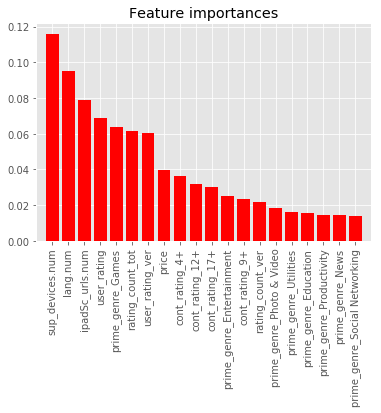

In [29]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center', color='r')
plt.xticks(range(d_first), feature_name[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])

In [30]:
ert = ensemble.ExtraTreesClassifier(n_estimators=100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test = np.mean(y_test != ert.predict(X_test))

print(err_train, err_test)

0.27234830940250115 0.4005557761016276


In [31]:
ada = ensemble.AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.5164427975914775 0.5234219928543072


In [32]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)